# Duffing Oscillator Solution

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
import mousai as ms
from scipy import pi, sin

In [3]:
# Test that all is working. 
# f_tol adjusts accuracy. This is smaller than reasonable, but illustrative of usage. 
t, x, e, amps, phases = ms.hb_time(ms.duff_osc, np.array([[0,1,-1]]), .7, f_tol = 1e-12)
print('Equation errors (should be zero): ',e)
print('Constant term of FFT of signal should be zero: ', ms.fftp.fft(x)[0,0])

Equation errors (should be zero):  [[ 1.11022302e-15 -1.68753900e-14  1.33226763e-15]]
Constant term of FFT of signal should be zero:  (-0.10771053458129715+0j)


In [3]:
# Using more harmonics. 
t, x, e, amps, phases = ms.hb_time(ms.duff_osc, x0 = sp.array([[0,1,-1]]), omega = .7, num_harmonics= 7)
print('Equation errors (should be zero): ', e)
print('Constant term of FFT of signal should be zero: ', ms.fftp.fft(x)[0,0])

Equation errors (should be zero):  [[  2.04616314e-08  -1.11916120e-08  -4.32641484e-09  -8.27785285e-10
   -1.06717036e-08  -2.49418783e-07  -6.82304595e-07  -1.59994936e-07
   -3.88299430e-11   9.85229565e-09   1.56362223e-09  -1.71778813e-10
    7.32659703e-08   4.91827027e-07   5.65568172e-07]]
Constant term of FFT of signal should be zero:  (7.04098108967e-06+0j)


Sometimes we can improve just by restarting from the prior end point. Sometimes, we just think it's improved. 

In [4]:
t, x, e, amps, phases = ms.hb_time(ms.duff_osc, x0 = x, omega = .7, num_harmonics= 7)
print('Errors: ', e)
print('Constant term of FFT of signal should be zero: ', ms.fftp.fft(x)[0,0])

Errors:  [[  7.29971639e-15   2.38697950e-15   1.02140518e-14   1.55431223e-14
    2.88657986e-14  -4.44089210e-16  -1.30007116e-13  -1.18793864e-14
   -5.61399885e-15  -1.65978342e-14  -2.33146835e-15  -1.99840144e-15
   -2.56461519e-14   7.13873405e-14   1.18960397e-13]]
Constant term of FFT of signal should be zero:  (7.08481329931e-06+0j)


/Users/jslater/anaconda3/lib/python3.6/site-packages/scipy/optimize/nonlin.py:474: RuntimeWarning: invalid value encountered in double_scalars
  and dx_norm/self.x_rtol <= x_norm))


The average for this problem is known to be zero, we got 4.72320886587e-07


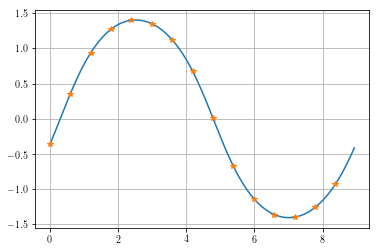

In [5]:
# Let's get a smoother response
time, xc = ms.time_history(t,x)
plt.plot(time,xc.T,t,x.T,'*')
plt.grid(True)
print('The average for this problem is known to be zero, we got', sp.average(x))

In [26]:
def duff_osc2(x, v, params):
    omega = params['omega']
    t = params['cur_time']
    return np.array([[-x-.1*x**3-.1*v+1*sin(omega*t)]])

[[-0.1854827   0.74408211  1.27869989  1.42305317  1.22766696  0.6400849
  -0.31045409 -1.06650367 -1.39410353 -1.36873107 -0.98898229]] [[  3.18347107e-09  -5.75875847e-10  -6.27391217e-09  -7.88667857e-08
   -2.08381912e-07  -1.90325802e-08   1.15335749e-09   3.95564803e-10
    2.19995009e-08   1.48110614e-07   1.50174076e-07]]
Constant term of FFT of signal should be zero:  (-0.000670319513207+0j)


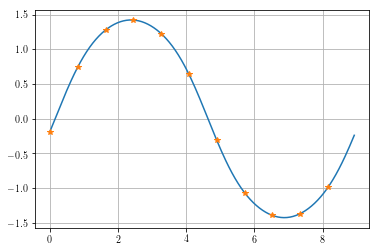

In [27]:
t, x, e, amps, phases = ms.hb_time(duff_osc2, np.array([[0,1,-1]]), .7, num_harmonics=5)

print(x,e)
print('Constant term of FFT of signal should be zero: ', ms.fftp.fft(x)[0,0])
time, xc = ms.time_history(t,x)

plt.plot(time, xc.T, t, x.T, '*')
plt.grid(True)

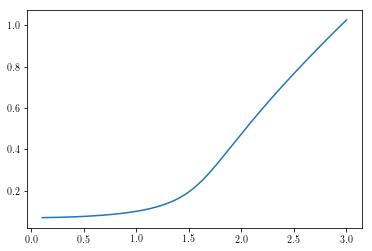

In [28]:
omega = sp.linspace(0.1,3,200)+1/200
amp = sp.zeros_like(omega)
x = sp.array([[0,-1,1,0,0]])
for i, freq in enumerate(omega):
    #print(i,freq,x)
    try:
        t, x, e, amps, phases = ms.hb_time(duff_osc2, x, freq)#, f_tol = 1e-10)#, callback = resid)
        amp[i]=amps[0]
    except:
        amp[i] = sp.nan    
plt.plot(omega, amp)

The break is an indicative of a break in the branch and is actually a result of the `solution` being unstable.  Not the system, but the solution. By that we mean that while this is considered a solution, it isn't one that will actually continue in a real situation and another solution will necessarily be found. 

A simple solution is to change the starting guess to be away from the solution and see if it finds another one. Indeed that happens. 



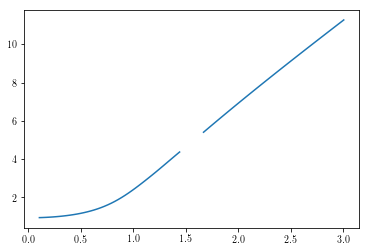

In [29]:
omega = sp.linspace(0.1,3,90)+1/200
amp = sp.zeros_like(omega)
x = np.array([[0,-1,1]])
for i, freq in enumerate(omega):
    #print(i,freq,x)
    #print(sp.average(x))
    x = x-sp.average(x)
    try:
        t, x, e, amps, phases = ms.hb_time(duff_osc2, x, freq, num_harmonics=4, verbose = False, f_tol = 1e-6)#, callback = resid)
        amp[i]=amps[0]
    except:
        amp[i] = sp.nan    
plt.plot(omega, amp)

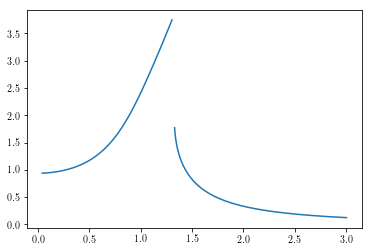

In [30]:
omegal = sp.arange(3,.03,-1/200)+1/200
ampl = sp.zeros_like(omegal)
x = sp.array([[0,-1,1]])
for i, freq in enumerate(omegal):
    # Here we try to obtain solutions, but if they don't work, 
    # we ignore them by inserting `np.nan` values.
    x = x-sp.average(x)
    try:
        t, x, e, amps, phases = ms.hb_time(duff_osc2, x, freq, num_harmonics=4, f_tol = 1e-6)#, callback = resid)
        ampl[i]=amps[0]
    except:
        ampl[i] = sp.nan
plt.plot(omegal, ampl)

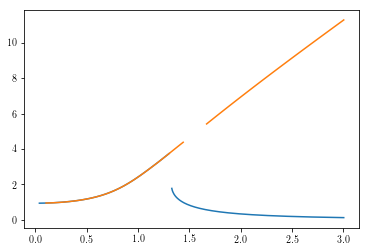

In [31]:
plt.plot(omegal,ampl)
plt.plot(omega,amp)
#plt.axis([0,3, 0, 10.5])

In [32]:
from scipy.optimize import newton_krylov

In [33]:
def duff_amp_resid(a):
    return (mu**2+(sigma-3/8*alpha/omega_0*a**2)**2)*a**2-(k**2)/4/omega_0**2

In [34]:
mu = 0.05 # damping
k = 1 # excitation amplitude
sigma = -0.9 #detuning
omega_0 = 1 # driving frequency
alpha = 0.1 # cubic coefficient

In [35]:
newton_krylov(duff_amp_resid,-.1)

array(-0.5478691201747141)

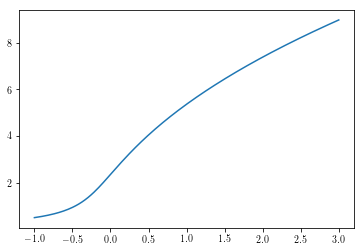

In [36]:
sigmas = sp.linspace(-1,3,200)
amplitudes = sp.zeros_like(sigmas)
x = newton_krylov(duff_amp_resid,1)
for i, sigma in enumerate(sigmas):
    try:
        amplitudes[i] = newton_krylov(duff_amp_resid,x)
        x = amplitudes[i]
    except:
        amplitudes[i] = newton_krylov(duff_amp_resid,0)
        x = amplitudes[i]

plt.plot(sigmas,amplitudes)

/Users/jslater/anaconda/lib/python3.6/site-packages/scipy/optimize/nonlin.py:474: RuntimeWarning: invalid value encountered in double_scalars
  and dx_norm/self.x_rtol <= x_norm))


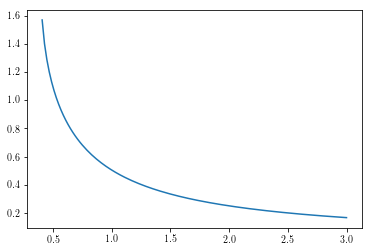

In [37]:
sigmas = sp.linspace(-1,3,200)
sigmasr = sigmas[::-1]
amplitudesr = sp.zeros_like(sigmas)
x = newton_krylov(duff_amp_resid,3)
for i, sigma in enumerate(sigmasr):
    try:
        amplitudesr[i] = newton_krylov(duff_amp_resid,x)
        x = amplitudesr[i]
    except:
        amplitudesr[i] = sp.nan#newton_krylov(duff_amp_resid,0)
        x = amplitudesr[i]
        

plt.plot(sigmasr,amplitudesr)

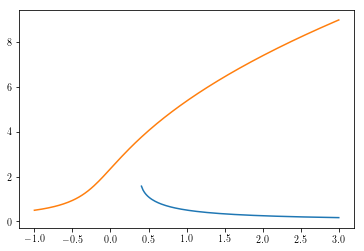

In [38]:
plt.plot(sigmasr,amplitudesr)
plt.plot(sigmas,amplitudes)

# Using lambda functions
As an aside, we can use a lambda function to solve a simple equation without much hassle. For example, $\ddot{x} + 0.1\dot{x}+ x + 0.1 x^3 = \sin(0.7t)$

In [14]:
def duff_osc2(x, v, params):
    omega = params['omega']
    t = params['cur_time']
    return np.array([[-x-.1*x**3-.1*v+1*sin(omega*t)]])
_,_,_,a,_ = ms.hb_time(duff_osc2, np.array([[0,1,-1]]), 0.7, num_harmonics=1)
print(a)

[ 1.47796291]


In [20]:
_,_,_,a,_ = ms.hb_time(lambda x,v, params:np.array([[-x-.1*x**3-.1*v+1*sin(0.7*params['cur_time'])]]), np.array([[0,1,-1]]), .7, num_harmonics=1)
a

array([ 1.47796291])

Two things to note: 
1. Remember that the lambda function has to return an `n by 1` array. 
2. Time must be referenced as params['cur_time']